## Notes

Edge weight = feasbility + actionability

where,

feasbility: statistical - how easy is it to get from data point A to data point B. Modelled by some distance measure (and density estimation)


actionability: something subjective - how easy is it for individual A to become individual B
(modelled by user specified constraints)

distance measure: feasability, start with categorical variables and apply to continuous

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
from face import FACE

In [3]:
y = [0,0,1,0,1,1,1,0,0,0,1,1,1,0]
ordinal_indexes = [0,1]
nominal_indexes = [2]

In [4]:
A1 = [0,0,1,2,2,0,1,1,1,2,2,0,1,2]
A2 = [0,1,1,2,2,0,1,1,2,2,0,0,1,1]
A3 = [0,1,2,1,0,2,2,0,1,1,0,1,2,2]

synthetic_df = pd.DataFrame()
synthetic_df['A1'] = A1 #ordinal
synthetic_df['A2'] = A2 #ordinal
synthetic_df['A3'] = A3 #nominal

In [5]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(synthetic_df.values, y)
print(svm.score(synthetic_df.values, y))

0.9285714285714286


In [6]:
ce = FACE(synthetic_df, svm, ordinal_indexes, nominal_indexes)

In [7]:
eg = synthetic_df.iloc[0].values.reshape(1, -1)
path, prob = ce.generate_counterfactual(eg)
pd.DataFrame(path, columns=['A1', 'A2', 'A3'])

14 nodes have been added to graph.
65 edges have been added to graph.


,A1,A2,A3
0,0,0,0
1,0,0,2


In [ ]:
## 2 is closer than 1 in A3 - becauseof distribution - more common to see 2s in data than 1s

In [8]:
all_data_df = synthetic_df.copy()
all_data_df['outcome'] = y

all_data_df

,A1,A2,A3,outcome
0,0,0,0,0
1,0,1,1,0
2,1,1,2,1
3,2,2,1,0
4,2,2,0,1
5,0,0,2,1
6,1,1,2,1
7,1,1,0,0
8,1,2,1,0
9,2,2,1,0


In [9]:
Y = y 
X = synthetic_df.values

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (2, 3).

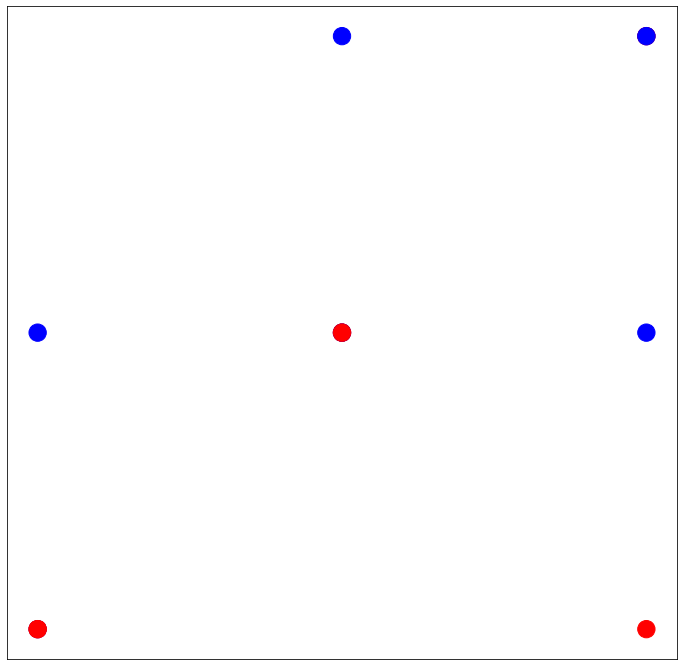

In [10]:
_, ax = plt.subplots(figsize=(12,12))
c = "br"
nx.draw_networkx(ce.G, pos=X, node_color=[c[int(y)] for y in Y], ax=ax)